In [29]:
import time

In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train_values.csv")
test = pd.read_csv("test_values.csv")
y = pd.read_csv("train_labels.csv")
train.drop('building_id', axis=1, inplace=True)

df = pd.concat([train,y.iloc[:,1]], axis=1)

full = pd.concat([train,test], axis=0)

In [11]:
'''
def grp(by):
    z = df.groupby(by).mean()
    return z['damage_grade']

grp('land_surface_condition')
'''

lsr = []
for item in full['land_surface_condition']:
    if item == 'n':
        lsr.append(2.25)
    elif item == 'o':
        lsr.append(2.29)
    elif item == 't':
        lsr.append(2.234)
full['land_surface_condition_risk'] = lsr

'''
for item in df.select_dtypes('object'):
    print(item)
    df.groupby(item).mean().head(100)

grp('foundation_type')
'''

ftr = []
for item in full['foundation_type']:
    if item=='h':
        ftr.append(2.106)
    elif item=='i':
        ftr.append(1.453)
    elif item=='r':
        ftr.append(2.33)
    elif item=='u':
        ftr.append(1.884)
    elif item=='w':
        ftr.append(1.812)
full['foundation_type_risk'] = ftr

rtr = []
for item in full['roof_type']:
    if item=='n':
        rtr.append(2.27)
    elif item=='q':
        rtr.append(2.32)
    elif item=='x':
        rtr.append(1.572)

full['roof_type_risk'] = rtr

gftr = []
for item in full['ground_floor_type']:
    if item=='f':
        gftr.append(2.31)
    elif item=='m':
        gftr.append(1.97)
    elif item=='v':
        gftr.append(1.63)
    elif item=='x':
        gftr.append(2.25)
    elif item=='z':
        gftr.append(2.07)
full['ground_floor_type_risk'] = gftr

oftr = []
for item in full['other_floor_type']:
    if item=='j':
        oftr.append(2.043)
    elif item=='q':
        oftr.append(2.3157)
    elif item=='s':
        oftr.append(1.607)
    elif item=='x':
        oftr.append(2.297)
full['other_floor_type_risk'] = oftr

ptr = []
for item in full['position']:
    if item=='j':
        ptr.append(2.153)
    elif item=='o':
        ptr.append(2.207)
    elif item=='s':
        ptr.append(2.229)
    elif item=='t':
        ptr.append(2.309)
full['position_risk'] = ptr

pctr = []
for item in full['plan_configuration']:
    if item=='c':
        pctr.append(1.837)
    elif item=='a':
        pctr.append(1.8532)
    elif item=='o':
        pctr.append(1.8931)
    elif item=='m':
        pctr.append(1.913)
    elif item=='u':
        pctr.append(1.9183)
    elif item=='s':
        pctr.append(2.05)
    elif item=='n':
        pctr.append(2.158)
    elif item=='d':
        pctr.append(2.24365)
    elif item=='q':
        pctr.append(2.2714)
    elif item=='f':
        pctr.append(2.2727)

full['plan_configuration_risk'] = pctr

lotr = []
for item in full['legal_ownership_status']:
    if item=='a':
        lotr.append(1.894)
    elif item=='r':
        lotr.append(2.217)
    elif item=='v':
        lotr.append(2.244)
    elif item=='w':
        lotr.append(2.4158)
full['legal_ownership_status_risk'] = lotr

full.drop('building_id',axis=1,inplace=True)

objects = []
for item in full.select_dtypes('object'):
    objects.append(item)
    

full.drop(objects, axis=1, inplace=True)

In [12]:
full['risk_factor'] = (full['land_surface_condition_risk'] + full['foundation_type_risk']+
                      full['roof_type_risk'] + full['ground_floor_type_risk'] + full['position_risk']+
                      full['other_floor_type_risk'] + full['plan_configuration_risk'] + full['legal_ownership_status_risk']) / 8

full['area_per_family'] = full['count_families'] / full['area_percentage']
full['height_per_floor'] = full['height_percentage'] / full['count_floors_pre_eq']
full['families_per_floor'] = full['count_families'] / full['count_floors_pre_eq']

full['has_superstructure'] = (full['has_superstructure_adobe_mud'] | full['has_superstructure_bamboo'] |
                              full['has_superstructure_cement_mortar_brick'] | full['has_superstructure_cement_mortar_stone'] |
                              full['has_superstructure_mud_mortar_brick'] | full['has_superstructure_mud_mortar_stone'] |
                              full['has_superstructure_other'] | full['has_superstructure_stone_flag'] |
                              full['has_superstructure_timber'])

full['has_cement'] = (full['has_superstructure_cement_mortar_brick'] | full['has_superstructure_cement_mortar_stone'])
full['has_mortar'] = (full['has_superstructure_mud_mortar_brick'] | full['has_superstructure_mud_mortar_stone'])


In [5]:
'''x.to_csv("train_fe_3.csv", index=False)
X.to_csv("test_fe_3.csv", index=False)
'''

'x.to_csv("train_fe_3.csv", index=False)\nX.to_csv("test_fe_3.csv", index=False)\n'

In [13]:
z = df.groupby(by='geo_level_1_id').mean()

geo_1_risk = {}
for i in range(0, z.shape[0]):
    geo_1_risk[i] = z.iloc[i,-1]


z = df.groupby(by='geo_level_2_id').mean()


geo_2_risk = {}
for i in range(0, z.shape[0]):
    geo_2_risk[i] = z.iloc[i,-1]


z = df.groupby(by='geo_level_3_id').mean()

geo_3_risk = {}
for i in range(0, z.shape[0]):
    geo_3_risk[i] = z.iloc[i,-1]


df['geo_1_risk'] = df['geo_level_1_id'].map(geo_1_risk)
df['geo_2_risk'] = df['geo_level_2_id'].map(geo_2_risk)
df['geo_3_risk'] = df['geo_level_3_id'].map(geo_3_risk)

df['geo_2_risk'].fillna(method='backfill', axis=0, inplace=True)
df['geo_3_risk'].fillna(method='backfill', axis=0, inplace=True)


full['geo_1_risk'] = full['geo_level_1_id'].map(geo_1_risk)
full['geo_2_risk'] = full['geo_level_2_id'].map(geo_2_risk)
full['geo_3_risk'] = full['geo_level_3_id'].map(geo_3_risk)

full['geo_2_risk'].fillna(method='backfill', axis=0, inplace=True)
full['geo_3_risk'].fillna(method='backfill', axis=0, inplace=True)


In [14]:
df.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1, inplace=True)

In [15]:
x = full.iloc[:len(train), :]
X = full.iloc[len(train):, :]

# MACHINE LEARNING

In [16]:
def run_model(model, data):
    model.fit(data[0], data[1])
    pred = model.predict(data[2])
    score = f1_score(data[3], pred, average='micro')
    return score

In [17]:
from sklearn.linear_model import LogisticRegression, LassoCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


lr = LogisticRegression()
sgdc = SGDClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
etc = ExtraTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier()
xgbr = XGBRFClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier()


models = [ lr, ada, bag, etc, gbc, rfc, 
           knn, xgb, xgbr, lgb, cat]


x_train,x_test,y_train,y_test = train_test_split(x,y['damage_grade'],test_size=0.13)

data = [x_train, y_train, x_test, y_test]

In [18]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1])
    

LogisticRegression 0.663065615868237
AdaBoostClassifier 0.6642758050709879
BaggingClassifier 0.7141296968623633
ExtraTreeClassifier 0.6506390389326722
GradientBoostingClassifier 0.6892470261814103
RandomForestClassifier 0.7113551167389829
KNeighborsClassifier 0.7076950323209068
[14:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7342011275421353
[14:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier 0.6783553233566516
LGBMClassifier 0.72215826913427

138:	learn: 0.6561559	total: 11s	remaining: 1m 8s
139:	learn: 0.6558815	total: 11.1s	remaining: 1m 8s
140:	learn: 0.6556558	total: 11.2s	remaining: 1m 8s
141:	learn: 0.6553084	total: 11.3s	remaining: 1m 8s
142:	learn: 0.6548265	total: 11.4s	remaining: 1m 8s
143:	learn: 0.6545331	total: 11.5s	remaining: 1m 8s
144:	learn: 0.6543393	total: 11.5s	remaining: 1m 8s
145:	learn: 0.6541657	total: 11.6s	remaining: 1m 7s
146:	learn: 0.6539338	total: 11.7s	remaining: 1m 7s
147:	learn: 0.6537617	total: 11.8s	remaining: 1m 7s
148:	learn: 0.6534349	total: 11.9s	remaining: 1m 7s
149:	learn: 0.6532056	total: 11.9s	remaining: 1m 7s
150:	learn: 0.6528802	total: 12s	remaining: 1m 7s
151:	learn: 0.6526273	total: 12.1s	remaining: 1m 7s
152:	learn: 0.6524780	total: 12.2s	remaining: 1m 7s
153:	learn: 0.6522875	total: 12.3s	remaining: 1m 7s
154:	learn: 0.6520663	total: 12.3s	remaining: 1m 7s
155:	learn: 0.6519553	total: 12.4s	remaining: 1m 7s
156:	learn: 0.6518000	total: 12.5s	remaining: 1m 6s
157:	learn: 0.65

299:	learn: 0.6263448	total: 23.9s	remaining: 55.8s
300:	learn: 0.6261557	total: 24s	remaining: 55.8s
301:	learn: 0.6260202	total: 24.1s	remaining: 55.7s
302:	learn: 0.6258783	total: 24.2s	remaining: 55.6s
303:	learn: 0.6257519	total: 24.2s	remaining: 55.5s
304:	learn: 0.6256445	total: 24.3s	remaining: 55.4s
305:	learn: 0.6255171	total: 24.4s	remaining: 55.3s
306:	learn: 0.6254140	total: 24.5s	remaining: 55.2s
307:	learn: 0.6252932	total: 24.5s	remaining: 55.1s
308:	learn: 0.6251884	total: 24.6s	remaining: 55.1s
309:	learn: 0.6250628	total: 24.7s	remaining: 55s
310:	learn: 0.6248680	total: 24.8s	remaining: 54.9s
311:	learn: 0.6247633	total: 24.9s	remaining: 54.8s
312:	learn: 0.6246119	total: 24.9s	remaining: 54.7s
313:	learn: 0.6244945	total: 25s	remaining: 54.6s
314:	learn: 0.6243826	total: 25.1s	remaining: 54.5s
315:	learn: 0.6242079	total: 25.2s	remaining: 54.5s
316:	learn: 0.6240047	total: 25.2s	remaining: 54.4s
317:	learn: 0.6239440	total: 25.3s	remaining: 54.3s
318:	learn: 0.6237

460:	learn: 0.6092717	total: 36.4s	remaining: 42.6s
461:	learn: 0.6091487	total: 36.5s	remaining: 42.5s
462:	learn: 0.6090819	total: 36.6s	remaining: 42.4s
463:	learn: 0.6089620	total: 36.7s	remaining: 42.4s
464:	learn: 0.6089317	total: 36.7s	remaining: 42.3s
465:	learn: 0.6087595	total: 36.8s	remaining: 42.2s
466:	learn: 0.6086678	total: 36.9s	remaining: 42.1s
467:	learn: 0.6086066	total: 37s	remaining: 42s
468:	learn: 0.6085570	total: 37s	remaining: 41.9s
469:	learn: 0.6084757	total: 37.1s	remaining: 41.9s
470:	learn: 0.6084063	total: 37.2s	remaining: 41.8s
471:	learn: 0.6083218	total: 37.3s	remaining: 41.7s
472:	learn: 0.6082489	total: 37.4s	remaining: 41.6s
473:	learn: 0.6081436	total: 37.4s	remaining: 41.5s
474:	learn: 0.6080751	total: 37.5s	remaining: 41.4s
475:	learn: 0.6080047	total: 37.6s	remaining: 41.4s
476:	learn: 0.6079131	total: 37.7s	remaining: 41.3s
477:	learn: 0.6078444	total: 37.8s	remaining: 41.2s
478:	learn: 0.6077521	total: 37.8s	remaining: 41.2s
479:	learn: 0.6076

619:	learn: 0.5968727	total: 48.8s	remaining: 29.9s
620:	learn: 0.5967974	total: 48.9s	remaining: 29.8s
621:	learn: 0.5967471	total: 48.9s	remaining: 29.7s
622:	learn: 0.5966751	total: 49s	remaining: 29.7s
623:	learn: 0.5965823	total: 49.1s	remaining: 29.6s
624:	learn: 0.5965404	total: 49.1s	remaining: 29.5s
625:	learn: 0.5964348	total: 49.2s	remaining: 29.4s
626:	learn: 0.5963975	total: 49.3s	remaining: 29.3s
627:	learn: 0.5963292	total: 49.4s	remaining: 29.2s
628:	learn: 0.5962670	total: 49.4s	remaining: 29.2s
629:	learn: 0.5962081	total: 49.5s	remaining: 29.1s
630:	learn: 0.5961481	total: 49.6s	remaining: 29s
631:	learn: 0.5961155	total: 49.7s	remaining: 28.9s
632:	learn: 0.5960798	total: 49.7s	remaining: 28.8s
633:	learn: 0.5960368	total: 49.8s	remaining: 28.8s
634:	learn: 0.5959576	total: 49.9s	remaining: 28.7s
635:	learn: 0.5958669	total: 50s	remaining: 28.6s
636:	learn: 0.5958107	total: 50s	remaining: 28.5s
637:	learn: 0.5957348	total: 50.1s	remaining: 28.4s
638:	learn: 0.595683

782:	learn: 0.5866692	total: 1m 1s	remaining: 17s
783:	learn: 0.5866173	total: 1m 1s	remaining: 16.9s
784:	learn: 0.5865432	total: 1m 1s	remaining: 16.9s
785:	learn: 0.5864996	total: 1m 1s	remaining: 16.8s
786:	learn: 0.5864115	total: 1m 1s	remaining: 16.7s
787:	learn: 0.5863832	total: 1m 1s	remaining: 16.6s
788:	learn: 0.5863530	total: 1m 1s	remaining: 16.5s
789:	learn: 0.5862860	total: 1m 1s	remaining: 16.5s
790:	learn: 0.5862491	total: 1m 2s	remaining: 16.4s
791:	learn: 0.5862021	total: 1m 2s	remaining: 16.3s
792:	learn: 0.5861586	total: 1m 2s	remaining: 16.2s
793:	learn: 0.5859932	total: 1m 2s	remaining: 16.2s
794:	learn: 0.5859150	total: 1m 2s	remaining: 16.1s
795:	learn: 0.5858541	total: 1m 2s	remaining: 16s
796:	learn: 0.5858199	total: 1m 2s	remaining: 15.9s
797:	learn: 0.5857372	total: 1m 2s	remaining: 15.8s
798:	learn: 0.5857124	total: 1m 2s	remaining: 15.8s
799:	learn: 0.5856233	total: 1m 2s	remaining: 15.7s
800:	learn: 0.5855674	total: 1m 2s	remaining: 15.6s
801:	learn: 0.58

940:	learn: 0.5785218	total: 1m 13s	remaining: 4.62s
941:	learn: 0.5784913	total: 1m 13s	remaining: 4.54s
942:	learn: 0.5784511	total: 1m 13s	remaining: 4.46s
943:	learn: 0.5784152	total: 1m 13s	remaining: 4.38s
944:	learn: 0.5783773	total: 1m 14s	remaining: 4.31s
945:	learn: 0.5783222	total: 1m 14s	remaining: 4.23s
946:	learn: 0.5782783	total: 1m 14s	remaining: 4.15s
947:	learn: 0.5782512	total: 1m 14s	remaining: 4.07s
948:	learn: 0.5782148	total: 1m 14s	remaining: 3.99s
949:	learn: 0.5781940	total: 1m 14s	remaining: 3.92s
950:	learn: 0.5781557	total: 1m 14s	remaining: 3.84s
951:	learn: 0.5781038	total: 1m 14s	remaining: 3.76s
952:	learn: 0.5780373	total: 1m 14s	remaining: 3.68s
953:	learn: 0.5780093	total: 1m 14s	remaining: 3.6s
954:	learn: 0.5779516	total: 1m 14s	remaining: 3.52s
955:	learn: 0.5778865	total: 1m 14s	remaining: 3.44s
956:	learn: 0.5778618	total: 1m 14s	remaining: 3.37s
957:	learn: 0.5778173	total: 1m 14s	remaining: 3.29s
958:	learn: 0.5777821	total: 1m 15s	remaining: 

In [19]:
import time

start = time.time()

print(run_model(BaggingClassifier(base_estimator=XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.05)), data))

end = time.time()

print("Time Taken:", end-start)

[14:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [23]:
clf = BaggingClassifier(base_estimator=XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.05))
clf.fit(x, y['damage_grade'])
pred = clf.predict(X)

sub =pd.read_csv('submission_format.csv')
sub['damage_grade'] = pred

[16:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [24]:
pred

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [26]:
sub.to_csv('Sub_18.csv', index=False)

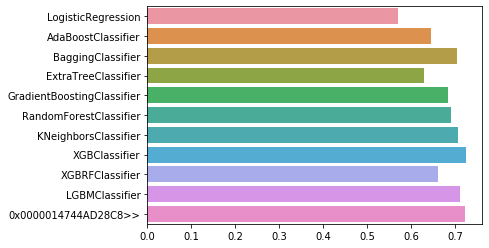

In [49]:
sns.barplot(model_performances, model_names)

## STACKING

In [27]:
from mlxtend.classifier import StackingCVClassifier


In [36]:
stack = StackingCVClassifier(classifiers=(XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.05), lgb, cat), 
                            meta_classifier=BaggingClassifier(base_estimator=XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.05)),
                            cv=5, use_features_in_secondary=True, use_probas=True, 
                            store_train_meta_features=True, shuffle=False, verbose=3)


In [ ]:
start = time.time()


print(run_model(stack, data))

end = time.time()

print("Time Taken = ", end-start," seconds")
print((end-start)/60, ' Minutes')
print((end-start)/3600, ' Hours')

Fitting 3 classifiers...
Fitting classifier1: xgbclassifier (1/3)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.7min remaining:    0.0s


[21:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 25.2min remaining:    0.0s


[21:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 62.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: lgbmclassifier (2/3)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: catboostclassifier (3/3)
Learning rate set to 0.10316
0:	learn: 1.0357034	total: 96.5ms	remaining: 1m 36s
1:	learn: 0.9864151	total: 156ms	remaining: 1m 17s
2:	learn: 0.9471765	total: 215ms	remaining: 1m 11s
3:	learn: 0.9130676	total: 281ms	remaining: 1m 10s
4:	learn: 0.8843879	total: 349ms	remaining: 1m 9s
5:	learn: 0.8603711	total: 417ms	remaining: 1m 9s
6:	learn: 0.8399451	total: 485ms	remaining: 1m 8s
7:	learn: 0.8217641	total: 556ms	remaining: 1m 8s
8:	learn: 0.8069896	total: 632ms	remaining: 1m 9s
9:	learn: 0.7937292	total: 704ms	remaining: 1m 9s
10:	learn: 0.7821211	total: 771ms	remaining: 1m 9s
11:	learn: 0.7719654	total: 847ms	remaining: 1m 9s
12:	learn: 0.7629149	total: 927ms	remaining: 1m 10s
13:	learn: 0.7552100	total: 998ms	remaining: 1m 10s
14:	learn: 0.7485558	total: 1.07s	remaining: 1m 10s
15:	learn: 0.7426017	total: 1.14s	remaining: 1m 10s
16:	learn: 0.7371288	total: 1.21s	remaining: 1m 9s
17:	learn: 0.7323987	total: 1.27s	remaining: 1m 9s
18:	lear

158:	learn: 0.6518489	total: 10.8s	remaining: 57.3s
159:	learn: 0.6516166	total: 10.9s	remaining: 57.3s
160:	learn: 0.6513058	total: 11s	remaining: 57.2s
161:	learn: 0.6511525	total: 11s	remaining: 57.1s
162:	learn: 0.6508548	total: 11.1s	remaining: 57s
163:	learn: 0.6506393	total: 11.2s	remaining: 57s
164:	learn: 0.6504137	total: 11.2s	remaining: 56.9s
165:	learn: 0.6502362	total: 11.3s	remaining: 56.9s
166:	learn: 0.6499996	total: 11.4s	remaining: 56.8s
167:	learn: 0.6496782	total: 11.5s	remaining: 56.8s
168:	learn: 0.6495068	total: 11.5s	remaining: 56.7s
169:	learn: 0.6493544	total: 11.6s	remaining: 56.6s
170:	learn: 0.6492215	total: 11.7s	remaining: 56.5s
171:	learn: 0.6489120	total: 11.7s	remaining: 56.5s
172:	learn: 0.6486921	total: 11.8s	remaining: 56.5s
173:	learn: 0.6484902	total: 11.9s	remaining: 56.4s
174:	learn: 0.6482985	total: 12s	remaining: 56.4s
175:	learn: 0.6481270	total: 12s	remaining: 56.3s
176:	learn: 0.6479367	total: 12.1s	remaining: 56.2s
177:	learn: 0.6477309	to

317:	learn: 0.6244571	total: 21.8s	remaining: 46.7s
318:	learn: 0.6242448	total: 21.8s	remaining: 46.6s
319:	learn: 0.6241361	total: 21.9s	remaining: 46.5s
320:	learn: 0.6240349	total: 22s	remaining: 46.5s
321:	learn: 0.6239562	total: 22s	remaining: 46.4s
322:	learn: 0.6238284	total: 22.1s	remaining: 46.4s
323:	learn: 0.6237181	total: 22.2s	remaining: 46.3s
324:	learn: 0.6235842	total: 22.3s	remaining: 46.2s
325:	learn: 0.6234510	total: 22.3s	remaining: 46.2s
326:	learn: 0.6233183	total: 22.4s	remaining: 46.1s
327:	learn: 0.6232469	total: 22.5s	remaining: 46s
328:	learn: 0.6231572	total: 22.5s	remaining: 45.9s
329:	learn: 0.6230691	total: 22.6s	remaining: 45.9s
330:	learn: 0.6229245	total: 22.7s	remaining: 45.8s
331:	learn: 0.6227983	total: 22.7s	remaining: 45.7s
332:	learn: 0.6226806	total: 22.8s	remaining: 45.7s
333:	learn: 0.6225515	total: 22.9s	remaining: 45.6s
334:	learn: 0.6223809	total: 22.9s	remaining: 45.5s
335:	learn: 0.6222332	total: 23s	remaining: 45.5s
336:	learn: 0.622111

476:	learn: 0.6078618	total: 33s	remaining: 36.2s
477:	learn: 0.6078101	total: 33.1s	remaining: 36.1s
478:	learn: 0.6077333	total: 33.1s	remaining: 36s
479:	learn: 0.6076493	total: 33.2s	remaining: 36s
480:	learn: 0.6076056	total: 33.3s	remaining: 35.9s
481:	learn: 0.6075114	total: 33.3s	remaining: 35.8s
482:	learn: 0.6074309	total: 33.4s	remaining: 35.7s
483:	learn: 0.6073326	total: 33.5s	remaining: 35.7s
484:	learn: 0.6072678	total: 33.5s	remaining: 35.6s
485:	learn: 0.6071902	total: 33.6s	remaining: 35.5s
486:	learn: 0.6071313	total: 33.7s	remaining: 35.5s
487:	learn: 0.6070226	total: 33.7s	remaining: 35.4s
488:	learn: 0.6068140	total: 33.8s	remaining: 35.3s
489:	learn: 0.6067455	total: 33.9s	remaining: 35.3s
490:	learn: 0.6067008	total: 34s	remaining: 35.2s
491:	learn: 0.6066026	total: 34s	remaining: 35.1s
492:	learn: 0.6065589	total: 34.1s	remaining: 35s
493:	learn: 0.6064888	total: 34.1s	remaining: 35s
494:	learn: 0.6063828	total: 34.2s	remaining: 34.9s
495:	learn: 0.6063323	tota

637:	learn: 0.5946812	total: 44.3s	remaining: 25.2s
638:	learn: 0.5946260	total: 44.4s	remaining: 25.1s
639:	learn: 0.5945352	total: 44.5s	remaining: 25s
640:	learn: 0.5944715	total: 44.5s	remaining: 24.9s
641:	learn: 0.5944549	total: 44.6s	remaining: 24.9s
642:	learn: 0.5944097	total: 44.7s	remaining: 24.8s
643:	learn: 0.5943374	total: 44.7s	remaining: 24.7s
644:	learn: 0.5942787	total: 44.8s	remaining: 24.6s
645:	learn: 0.5942438	total: 44.9s	remaining: 24.6s
646:	learn: 0.5941280	total: 44.9s	remaining: 24.5s
647:	learn: 0.5940745	total: 45s	remaining: 24.4s
648:	learn: 0.5939926	total: 45.1s	remaining: 24.4s
649:	learn: 0.5938711	total: 45.2s	remaining: 24.3s
650:	learn: 0.5938383	total: 45.3s	remaining: 24.3s
651:	learn: 0.5937871	total: 45.4s	remaining: 24.2s
652:	learn: 0.5937074	total: 45.5s	remaining: 24.2s
653:	learn: 0.5936425	total: 45.5s	remaining: 24.1s
654:	learn: 0.5935825	total: 45.6s	remaining: 24s
655:	learn: 0.5934863	total: 45.7s	remaining: 23.9s
656:	learn: 0.5933

799:	learn: 0.5841213	total: 55.8s	remaining: 13.9s
800:	learn: 0.5840434	total: 55.9s	remaining: 13.9s
801:	learn: 0.5839496	total: 55.9s	remaining: 13.8s
802:	learn: 0.5838835	total: 56s	remaining: 13.7s
803:	learn: 0.5838499	total: 56.1s	remaining: 13.7s
804:	learn: 0.5837981	total: 56.1s	remaining: 13.6s
805:	learn: 0.5836826	total: 56.2s	remaining: 13.5s
806:	learn: 0.5836138	total: 56.3s	remaining: 13.5s
807:	learn: 0.5835719	total: 56.3s	remaining: 13.4s
808:	learn: 0.5835338	total: 56.4s	remaining: 13.3s
809:	learn: 0.5834539	total: 56.5s	remaining: 13.2s
810:	learn: 0.5834204	total: 56.5s	remaining: 13.2s
811:	learn: 0.5833854	total: 56.6s	remaining: 13.1s
812:	learn: 0.5833104	total: 56.7s	remaining: 13s
813:	learn: 0.5832602	total: 56.7s	remaining: 13s
814:	learn: 0.5832217	total: 56.8s	remaining: 12.9s
815:	learn: 0.5831214	total: 56.9s	remaining: 12.8s
816:	learn: 0.5830541	total: 56.9s	remaining: 12.8s
817:	learn: 0.5829492	total: 57s	remaining: 12.7s
818:	learn: 0.582902

961:	learn: 0.5753896	total: 1m 7s	remaining: 2.66s
962:	learn: 0.5753660	total: 1m 7s	remaining: 2.59s
963:	learn: 0.5753169	total: 1m 7s	remaining: 2.52s
964:	learn: 0.5752531	total: 1m 7s	remaining: 2.45s
965:	learn: 0.5752091	total: 1m 7s	remaining: 2.38s
966:	learn: 0.5751630	total: 1m 7s	remaining: 2.31s
967:	learn: 0.5751344	total: 1m 7s	remaining: 2.24s
968:	learn: 0.5750917	total: 1m 7s	remaining: 2.17s
969:	learn: 0.5750292	total: 1m 7s	remaining: 2.1s
970:	learn: 0.5749694	total: 1m 7s	remaining: 2.03s
971:	learn: 0.5748976	total: 1m 8s	remaining: 1.96s
972:	learn: 0.5748350	total: 1m 8s	remaining: 1.89s
973:	learn: 0.5747822	total: 1m 8s	remaining: 1.82s
974:	learn: 0.5747485	total: 1m 8s	remaining: 1.75s
975:	learn: 0.5746799	total: 1m 8s	remaining: 1.68s
976:	learn: 0.5746267	total: 1m 8s	remaining: 1.61s
977:	learn: 0.5745319	total: 1m 8s	remaining: 1.54s
978:	learn: 0.5744979	total: 1m 8s	remaining: 1.47s
979:	learn: 0.5744798	total: 1m 8s	remaining: 1.4s
980:	learn: 0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


Learning rate set to 0.10316
0:	learn: 1.0355382	total: 75ms	remaining: 1m 14s
1:	learn: 0.9856802	total: 139ms	remaining: 1m 9s
2:	learn: 0.9464748	total: 216ms	remaining: 1m 11s
3:	learn: 0.9120394	total: 299ms	remaining: 1m 14s
4:	learn: 0.8843185	total: 386ms	remaining: 1m 16s
5:	learn: 0.8599174	total: 468ms	remaining: 1m 17s
6:	learn: 0.8393550	total: 550ms	remaining: 1m 18s
7:	learn: 0.8209833	total: 630ms	remaining: 1m 18s
8:	learn: 0.8055101	total: 709ms	remaining: 1m 18s
9:	learn: 0.7920025	total: 778ms	remaining: 1m 16s
10:	learn: 0.7804309	total: 843ms	remaining: 1m 15s
11:	learn: 0.7701079	total: 910ms	remaining: 1m 14s
12:	learn: 0.7611836	total: 984ms	remaining: 1m 14s
13:	learn: 0.7538384	total: 1.05s	remaining: 1m 14s
14:	learn: 0.7468631	total: 1.12s	remaining: 1m 13s
15:	learn: 0.7405957	total: 1.19s	remaining: 1m 13s
16:	learn: 0.7358285	total: 1.25s	remaining: 1m 12s
17:	learn: 0.7311445	total: 1.32s	remaining: 1m 12s
18:	learn: 0.7267332	total: 1.39s	remaining: 1m

161:	learn: 0.6493321	total: 11.6s	remaining: 60s
162:	learn: 0.6490001	total: 11.7s	remaining: 59.9s
163:	learn: 0.6485864	total: 11.7s	remaining: 59.9s
164:	learn: 0.6482782	total: 11.8s	remaining: 59.8s
165:	learn: 0.6481221	total: 11.9s	remaining: 59.7s
166:	learn: 0.6479362	total: 12s	remaining: 59.6s
167:	learn: 0.6477135	total: 12s	remaining: 59.6s
168:	learn: 0.6474462	total: 12.1s	remaining: 59.5s
169:	learn: 0.6472700	total: 12.2s	remaining: 59.4s
170:	learn: 0.6469975	total: 12.2s	remaining: 59.3s
171:	learn: 0.6466399	total: 12.3s	remaining: 59.3s
172:	learn: 0.6464474	total: 12.4s	remaining: 59.2s
173:	learn: 0.6462179	total: 12.5s	remaining: 59.1s
174:	learn: 0.6460796	total: 12.5s	remaining: 59s
175:	learn: 0.6457694	total: 12.6s	remaining: 59s
176:	learn: 0.6456152	total: 12.7s	remaining: 58.9s
177:	learn: 0.6454155	total: 12.7s	remaining: 58.8s
178:	learn: 0.6452468	total: 12.8s	remaining: 58.6s
179:	learn: 0.6449951	total: 12.9s	remaining: 58.6s
180:	learn: 0.6447142	

320:	learn: 0.6225994	total: 22.6s	remaining: 47.9s
321:	learn: 0.6224194	total: 22.7s	remaining: 47.8s
322:	learn: 0.6223432	total: 22.8s	remaining: 47.7s
323:	learn: 0.6223011	total: 22.8s	remaining: 47.6s
324:	learn: 0.6221855	total: 22.9s	remaining: 47.6s
325:	learn: 0.6219340	total: 23s	remaining: 47.5s
326:	learn: 0.6218478	total: 23.1s	remaining: 47.4s
327:	learn: 0.6216978	total: 23.1s	remaining: 47.4s
328:	learn: 0.6215799	total: 23.2s	remaining: 47.3s
329:	learn: 0.6214877	total: 23.2s	remaining: 47.2s
330:	learn: 0.6214026	total: 23.3s	remaining: 47.1s
331:	learn: 0.6211919	total: 23.4s	remaining: 47.1s
332:	learn: 0.6210617	total: 23.5s	remaining: 47s
333:	learn: 0.6209944	total: 23.5s	remaining: 46.9s
334:	learn: 0.6208648	total: 23.6s	remaining: 46.8s
335:	learn: 0.6207544	total: 23.6s	remaining: 46.7s
336:	learn: 0.6206878	total: 23.7s	remaining: 46.6s
337:	learn: 0.6205325	total: 23.8s	remaining: 46.6s
338:	learn: 0.6204041	total: 23.9s	remaining: 46.5s
339:	learn: 0.62

481:	learn: 0.6056934	total: 33.6s	remaining: 36.1s
482:	learn: 0.6055871	total: 33.6s	remaining: 36s
483:	learn: 0.6054546	total: 33.7s	remaining: 35.9s
484:	learn: 0.6054012	total: 33.8s	remaining: 35.9s
485:	learn: 0.6052859	total: 33.9s	remaining: 35.8s
486:	learn: 0.6052502	total: 33.9s	remaining: 35.7s
487:	learn: 0.6051544	total: 34s	remaining: 35.7s
488:	learn: 0.6050580	total: 34.1s	remaining: 35.6s
489:	learn: 0.6049652	total: 34.1s	remaining: 35.5s
490:	learn: 0.6048848	total: 34.2s	remaining: 35.5s
491:	learn: 0.6048088	total: 34.3s	remaining: 35.4s
492:	learn: 0.6047116	total: 34.3s	remaining: 35.3s
493:	learn: 0.6046239	total: 34.4s	remaining: 35.2s
494:	learn: 0.6044841	total: 34.5s	remaining: 35.2s
495:	learn: 0.6043846	total: 34.6s	remaining: 35.1s
496:	learn: 0.6042776	total: 34.6s	remaining: 35s
497:	learn: 0.6042086	total: 34.7s	remaining: 35s
498:	learn: 0.6040989	total: 34.8s	remaining: 34.9s
499:	learn: 0.6039308	total: 34.9s	remaining: 34.9s
500:	learn: 0.603846

641:	learn: 0.5928878	total: 44.6s	remaining: 24.9s
642:	learn: 0.5928071	total: 44.7s	remaining: 24.8s
643:	learn: 0.5927494	total: 44.8s	remaining: 24.7s
644:	learn: 0.5927097	total: 44.8s	remaining: 24.7s
645:	learn: 0.5926291	total: 44.9s	remaining: 24.6s
646:	learn: 0.5925743	total: 45s	remaining: 24.5s
647:	learn: 0.5924692	total: 45s	remaining: 24.5s
648:	learn: 0.5924293	total: 45.1s	remaining: 24.4s
649:	learn: 0.5923466	total: 45.2s	remaining: 24.3s
650:	learn: 0.5922491	total: 45.2s	remaining: 24.3s
651:	learn: 0.5921538	total: 45.3s	remaining: 24.2s
652:	learn: 0.5921200	total: 45.4s	remaining: 24.1s
653:	learn: 0.5920557	total: 45.5s	remaining: 24.1s
654:	learn: 0.5919681	total: 45.5s	remaining: 24s
655:	learn: 0.5919076	total: 45.6s	remaining: 23.9s
656:	learn: 0.5918577	total: 45.7s	remaining: 23.8s
657:	learn: 0.5917592	total: 45.7s	remaining: 23.8s
658:	learn: 0.5917096	total: 45.8s	remaining: 23.7s
659:	learn: 0.5916404	total: 45.9s	remaining: 23.6s
660:	learn: 0.5915

803:	learn: 0.5823734	total: 55.7s	remaining: 13.6s
804:	learn: 0.5823338	total: 55.7s	remaining: 13.5s
805:	learn: 0.5822580	total: 55.8s	remaining: 13.4s
806:	learn: 0.5822013	total: 55.9s	remaining: 13.4s
807:	learn: 0.5821585	total: 56s	remaining: 13.3s
808:	learn: 0.5820815	total: 56s	remaining: 13.2s
809:	learn: 0.5820412	total: 56.1s	remaining: 13.2s
810:	learn: 0.5819609	total: 56.2s	remaining: 13.1s
811:	learn: 0.5818834	total: 56.2s	remaining: 13s
812:	learn: 0.5818262	total: 56.3s	remaining: 12.9s
813:	learn: 0.5817679	total: 56.4s	remaining: 12.9s
814:	learn: 0.5816982	total: 56.4s	remaining: 12.8s
815:	learn: 0.5816145	total: 56.5s	remaining: 12.7s
816:	learn: 0.5815424	total: 56.6s	remaining: 12.7s
817:	learn: 0.5814707	total: 56.7s	remaining: 12.6s
818:	learn: 0.5813967	total: 56.7s	remaining: 12.5s
819:	learn: 0.5813185	total: 56.8s	remaining: 12.5s
820:	learn: 0.5812340	total: 56.9s	remaining: 12.4s
821:	learn: 0.5811399	total: 56.9s	remaining: 12.3s
822:	learn: 0.5810

963:	learn: 0.5735118	total: 1m 7s	remaining: 2.51s
964:	learn: 0.5734801	total: 1m 7s	remaining: 2.44s
965:	learn: 0.5734396	total: 1m 7s	remaining: 2.37s
966:	learn: 0.5733771	total: 1m 7s	remaining: 2.3s
967:	learn: 0.5733317	total: 1m 7s	remaining: 2.23s
968:	learn: 0.5732942	total: 1m 7s	remaining: 2.16s
969:	learn: 0.5732426	total: 1m 7s	remaining: 2.09s
970:	learn: 0.5731743	total: 1m 7s	remaining: 2.02s
971:	learn: 0.5731081	total: 1m 7s	remaining: 1.95s
972:	learn: 0.5730351	total: 1m 7s	remaining: 1.88s
973:	learn: 0.5729865	total: 1m 7s	remaining: 1.81s
974:	learn: 0.5729189	total: 1m 7s	remaining: 1.74s
975:	learn: 0.5728596	total: 1m 7s	remaining: 1.67s
976:	learn: 0.5728085	total: 1m 8s	remaining: 1.6s
977:	learn: 0.5727682	total: 1m 8s	remaining: 1.53s
978:	learn: 0.5726817	total: 1m 8s	remaining: 1.46s
979:	learn: 0.5726484	total: 1m 8s	remaining: 1.39s
980:	learn: 0.5726276	total: 1m 8s	remaining: 1.32s
981:	learn: 0.5726001	total: 1m 8s	remaining: 1.25s
982:	learn: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


Learning rate set to 0.10316
0:	learn: 1.0357239	total: 72.7ms	remaining: 1m 12s
1:	learn: 0.9859394	total: 138ms	remaining: 1m 8s
2:	learn: 0.9464848	total: 205ms	remaining: 1m 7s
3:	learn: 0.9122824	total: 273ms	remaining: 1m 7s
4:	learn: 0.8838649	total: 339ms	remaining: 1m 7s
5:	learn: 0.8599929	total: 412ms	remaining: 1m 8s
6:	learn: 0.8397072	total: 487ms	remaining: 1m 9s
7:	learn: 0.8216316	total: 559ms	remaining: 1m 9s
8:	learn: 0.8061386	total: 637ms	remaining: 1m 10s
9:	learn: 0.7926540	total: 708ms	remaining: 1m 10s
10:	learn: 0.7811686	total: 775ms	remaining: 1m 9s
11:	learn: 0.7709831	total: 844ms	remaining: 1m 9s
12:	learn: 0.7625721	total: 925ms	remaining: 1m 10s
13:	learn: 0.7548394	total: 995ms	remaining: 1m 10s
14:	learn: 0.7478334	total: 1.07s	remaining: 1m 10s
15:	learn: 0.7415442	total: 1.14s	remaining: 1m 10s
16:	learn: 0.7369131	total: 1.22s	remaining: 1m 10s
17:	learn: 0.7320110	total: 1.28s	remaining: 1m 10s
18:	learn: 0.7276947	total: 1.35s	remaining: 1m 9s
19

162:	learn: 0.6494483	total: 11.3s	remaining: 58s
163:	learn: 0.6492312	total: 11.4s	remaining: 57.9s
164:	learn: 0.6490218	total: 11.4s	remaining: 57.8s
165:	learn: 0.6488401	total: 11.5s	remaining: 57.8s
166:	learn: 0.6486827	total: 11.6s	remaining: 57.7s
167:	learn: 0.6484265	total: 11.6s	remaining: 57.6s
168:	learn: 0.6481749	total: 11.7s	remaining: 57.6s
169:	learn: 0.6479334	total: 11.8s	remaining: 57.5s
170:	learn: 0.6477607	total: 11.9s	remaining: 57.5s
171:	learn: 0.6476136	total: 11.9s	remaining: 57.4s
172:	learn: 0.6473739	total: 12s	remaining: 57.3s
173:	learn: 0.6471378	total: 12.1s	remaining: 57.2s
174:	learn: 0.6469100	total: 12.1s	remaining: 57.2s
175:	learn: 0.6466789	total: 12.2s	remaining: 57.1s
176:	learn: 0.6465256	total: 12.3s	remaining: 57s
177:	learn: 0.6463177	total: 12.3s	remaining: 56.9s
178:	learn: 0.6461681	total: 12.4s	remaining: 56.8s
179:	learn: 0.6459530	total: 12.4s	remaining: 56.7s
180:	learn: 0.6457654	total: 12.5s	remaining: 56.6s
181:	learn: 0.6454

321:	learn: 0.6238152	total: 22.1s	remaining: 46.6s
322:	learn: 0.6237066	total: 22.2s	remaining: 46.5s
323:	learn: 0.6236069	total: 22.3s	remaining: 46.5s
324:	learn: 0.6234011	total: 22.3s	remaining: 46.4s
325:	learn: 0.6231599	total: 22.4s	remaining: 46.4s
326:	learn: 0.6230584	total: 22.5s	remaining: 46.3s
327:	learn: 0.6229535	total: 22.5s	remaining: 46.2s
328:	learn: 0.6228188	total: 22.6s	remaining: 46.1s
329:	learn: 0.6226788	total: 22.7s	remaining: 46.1s
330:	learn: 0.6225584	total: 22.8s	remaining: 46s
331:	learn: 0.6223771	total: 22.8s	remaining: 46s
332:	learn: 0.6222905	total: 22.9s	remaining: 45.9s
333:	learn: 0.6221388	total: 23s	remaining: 45.8s
334:	learn: 0.6220354	total: 23.1s	remaining: 45.8s
335:	learn: 0.6219356	total: 23.1s	remaining: 45.7s
336:	learn: 0.6218184	total: 23.2s	remaining: 45.6s
337:	learn: 0.6217172	total: 23.3s	remaining: 45.5s
338:	learn: 0.6216128	total: 23.3s	remaining: 45.5s
339:	learn: 0.6214615	total: 23.4s	remaining: 45.4s
340:	learn: 0.6212

482:	learn: 0.6068799	total: 34.2s	remaining: 36.6s
483:	learn: 0.6067009	total: 34.3s	remaining: 36.5s
484:	learn: 0.6065157	total: 34.3s	remaining: 36.5s
485:	learn: 0.6064485	total: 34.4s	remaining: 36.4s
486:	learn: 0.6064133	total: 34.5s	remaining: 36.3s
487:	learn: 0.6063571	total: 34.5s	remaining: 36.2s
488:	learn: 0.6063026	total: 34.6s	remaining: 36.2s
489:	learn: 0.6062043	total: 34.7s	remaining: 36.1s
490:	learn: 0.6061163	total: 34.7s	remaining: 36s
491:	learn: 0.6060273	total: 34.8s	remaining: 35.9s
492:	learn: 0.6058754	total: 34.9s	remaining: 35.9s
493:	learn: 0.6058003	total: 35s	remaining: 35.8s
494:	learn: 0.6057293	total: 35s	remaining: 35.7s
495:	learn: 0.6055087	total: 35.1s	remaining: 35.7s
496:	learn: 0.6054264	total: 35.2s	remaining: 35.6s
497:	learn: 0.6053374	total: 35.2s	remaining: 35.5s
498:	learn: 0.6052469	total: 35.3s	remaining: 35.4s
499:	learn: 0.6051434	total: 35.4s	remaining: 35.4s
500:	learn: 0.6050817	total: 35.4s	remaining: 35.3s
501:	learn: 0.6050

641:	learn: 0.5938768	total: 45s	remaining: 25.1s
642:	learn: 0.5937899	total: 45.1s	remaining: 25s
643:	learn: 0.5937124	total: 45.2s	remaining: 25s
644:	learn: 0.5935940	total: 45.2s	remaining: 24.9s
645:	learn: 0.5935362	total: 45.3s	remaining: 24.8s
646:	learn: 0.5934892	total: 45.4s	remaining: 24.8s
647:	learn: 0.5933507	total: 45.4s	remaining: 24.7s
648:	learn: 0.5932721	total: 45.5s	remaining: 24.6s
649:	learn: 0.5931906	total: 45.6s	remaining: 24.5s
650:	learn: 0.5931113	total: 45.7s	remaining: 24.5s
651:	learn: 0.5930368	total: 45.7s	remaining: 24.4s
652:	learn: 0.5929754	total: 45.8s	remaining: 24.3s
653:	learn: 0.5928718	total: 45.9s	remaining: 24.3s
654:	learn: 0.5928272	total: 45.9s	remaining: 24.2s
655:	learn: 0.5927858	total: 46s	remaining: 24.1s
656:	learn: 0.5926919	total: 46.1s	remaining: 24s
657:	learn: 0.5926377	total: 46.1s	remaining: 24s
658:	learn: 0.5925704	total: 46.2s	remaining: 23.9s
659:	learn: 0.5924915	total: 46.3s	remaining: 23.8s
660:	learn: 0.5924290	to

801:	learn: 0.5837770	total: 55.8s	remaining: 13.8s
802:	learn: 0.5836892	total: 55.8s	remaining: 13.7s
803:	learn: 0.5835988	total: 55.9s	remaining: 13.6s
804:	learn: 0.5835193	total: 56s	remaining: 13.6s
805:	learn: 0.5834607	total: 56s	remaining: 13.5s
806:	learn: 0.5833940	total: 56.1s	remaining: 13.4s
807:	learn: 0.5833496	total: 56.2s	remaining: 13.4s
808:	learn: 0.5832740	total: 56.3s	remaining: 13.3s
809:	learn: 0.5832010	total: 56.3s	remaining: 13.2s
810:	learn: 0.5831548	total: 56.4s	remaining: 13.1s
811:	learn: 0.5830541	total: 56.5s	remaining: 13.1s
812:	learn: 0.5830326	total: 56.5s	remaining: 13s
813:	learn: 0.5829339	total: 56.6s	remaining: 12.9s
814:	learn: 0.5828751	total: 56.7s	remaining: 12.9s
815:	learn: 0.5827761	total: 56.7s	remaining: 12.8s
816:	learn: 0.5827170	total: 56.8s	remaining: 12.7s
817:	learn: 0.5826546	total: 56.9s	remaining: 12.7s
818:	learn: 0.5825878	total: 56.9s	remaining: 12.6s
819:	learn: 0.5825156	total: 57s	remaining: 12.5s
820:	learn: 0.582478

961:	learn: 0.5747276	total: 1m 6s	remaining: 2.63s
962:	learn: 0.5746703	total: 1m 6s	remaining: 2.56s
963:	learn: 0.5745951	total: 1m 6s	remaining: 2.49s
964:	learn: 0.5745335	total: 1m 6s	remaining: 2.42s
965:	learn: 0.5745080	total: 1m 6s	remaining: 2.35s
966:	learn: 0.5744569	total: 1m 6s	remaining: 2.28s
967:	learn: 0.5743967	total: 1m 6s	remaining: 2.21s
968:	learn: 0.5743611	total: 1m 6s	remaining: 2.14s
969:	learn: 0.5743342	total: 1m 7s	remaining: 2.07s
970:	learn: 0.5742947	total: 1m 7s	remaining: 2s
971:	learn: 0.5742235	total: 1m 7s	remaining: 1.94s
972:	learn: 0.5741809	total: 1m 7s	remaining: 1.87s
973:	learn: 0.5741422	total: 1m 7s	remaining: 1.8s
974:	learn: 0.5740987	total: 1m 7s	remaining: 1.73s
975:	learn: 0.5740762	total: 1m 7s	remaining: 1.66s
976:	learn: 0.5740386	total: 1m 7s	remaining: 1.59s
977:	learn: 0.5740026	total: 1m 7s	remaining: 1.52s
978:	learn: 0.5739782	total: 1m 7s	remaining: 1.45s
979:	learn: 0.5739421	total: 1m 7s	remaining: 1.38s
980:	learn: 0.57

120:	learn: 0.6611233	total: 9.19s	remaining: 1m 6s
121:	learn: 0.6608137	total: 9.26s	remaining: 1m 6s
122:	learn: 0.6604492	total: 9.32s	remaining: 1m 6s
123:	learn: 0.6602860	total: 9.38s	remaining: 1m 6s
124:	learn: 0.6601107	total: 9.45s	remaining: 1m 6s
125:	learn: 0.6597545	total: 9.52s	remaining: 1m 6s
126:	learn: 0.6593656	total: 9.6s	remaining: 1m 5s
127:	learn: 0.6590299	total: 9.68s	remaining: 1m 5s
128:	learn: 0.6587200	total: 9.76s	remaining: 1m 5s
129:	learn: 0.6581990	total: 9.85s	remaining: 1m 5s
130:	learn: 0.6578556	total: 9.93s	remaining: 1m 5s
131:	learn: 0.6576488	total: 10s	remaining: 1m 5s
132:	learn: 0.6573951	total: 10.1s	remaining: 1m 5s
133:	learn: 0.6570136	total: 10.1s	remaining: 1m 5s
134:	learn: 0.6568492	total: 10.2s	remaining: 1m 5s
135:	learn: 0.6566746	total: 10.3s	remaining: 1m 5s
136:	learn: 0.6563152	total: 10.4s	remaining: 1m 5s
137:	learn: 0.6561096	total: 10.4s	remaining: 1m 5s
138:	learn: 0.6558320	total: 10.5s	remaining: 1m 5s
139:	learn: 0.6

281:	learn: 0.6285665	total: 20.4s	remaining: 51.9s
282:	learn: 0.6284364	total: 20.5s	remaining: 51.9s
283:	learn: 0.6283393	total: 20.5s	remaining: 51.8s
284:	learn: 0.6282329	total: 20.6s	remaining: 51.7s
285:	learn: 0.6280872	total: 20.7s	remaining: 51.6s
286:	learn: 0.6280121	total: 20.7s	remaining: 51.5s
287:	learn: 0.6278099	total: 20.9s	remaining: 51.7s
288:	learn: 0.6276706	total: 21s	remaining: 51.6s
289:	learn: 0.6275966	total: 21s	remaining: 51.5s
290:	learn: 0.6275180	total: 21.1s	remaining: 51.4s
291:	learn: 0.6274382	total: 21.2s	remaining: 51.3s
292:	learn: 0.6273693	total: 21.2s	remaining: 51.2s
293:	learn: 0.6272667	total: 21.3s	remaining: 51.1s
294:	learn: 0.6271617	total: 21.4s	remaining: 51s
295:	learn: 0.6270661	total: 21.4s	remaining: 51s
296:	learn: 0.6269991	total: 21.5s	remaining: 50.9s
297:	learn: 0.6268216	total: 21.7s	remaining: 51.1s
298:	learn: 0.6267328	total: 21.7s	remaining: 51s
299:	learn: 0.6265277	total: 21.8s	remaining: 50.9s
300:	learn: 0.6264185	

443:	learn: 0.6099138	total: 31.8s	remaining: 39.8s
444:	learn: 0.6098191	total: 31.9s	remaining: 39.8s
445:	learn: 0.6097269	total: 31.9s	remaining: 39.7s
446:	learn: 0.6096629	total: 32s	remaining: 39.6s
447:	learn: 0.6095872	total: 32.1s	remaining: 39.5s
448:	learn: 0.6094851	total: 32.2s	remaining: 39.5s
449:	learn: 0.6093805	total: 32.2s	remaining: 39.4s
450:	learn: 0.6092479	total: 32.3s	remaining: 39.3s
451:	learn: 0.6091442	total: 32.4s	remaining: 39.2s
452:	learn: 0.6090210	total: 32.4s	remaining: 39.2s
453:	learn: 0.6089194	total: 32.5s	remaining: 39.1s
454:	learn: 0.6088498	total: 32.6s	remaining: 39s
455:	learn: 0.6086210	total: 32.6s	remaining: 38.9s
456:	learn: 0.6085121	total: 32.7s	remaining: 38.9s
457:	learn: 0.6084136	total: 32.8s	remaining: 38.8s
458:	learn: 0.6081996	total: 32.8s	remaining: 38.7s
459:	learn: 0.6079850	total: 32.9s	remaining: 38.7s
460:	learn: 0.6078427	total: 33s	remaining: 38.6s
461:	learn: 0.6077556	total: 33.1s	remaining: 38.5s
462:	learn: 0.6076

604:	learn: 0.5960470	total: 42.7s	remaining: 27.9s
605:	learn: 0.5959843	total: 42.8s	remaining: 27.8s
606:	learn: 0.5959081	total: 42.8s	remaining: 27.7s
607:	learn: 0.5958508	total: 42.9s	remaining: 27.7s
608:	learn: 0.5957486	total: 43s	remaining: 27.6s
609:	learn: 0.5956539	total: 43.1s	remaining: 27.5s
610:	learn: 0.5955871	total: 43.1s	remaining: 27.5s
611:	learn: 0.5955276	total: 43.2s	remaining: 27.4s
612:	learn: 0.5954055	total: 43.3s	remaining: 27.3s
613:	learn: 0.5953146	total: 43.3s	remaining: 27.3s
614:	learn: 0.5952209	total: 43.4s	remaining: 27.2s
615:	learn: 0.5951638	total: 43.5s	remaining: 27.1s
616:	learn: 0.5950945	total: 43.6s	remaining: 27s
617:	learn: 0.5950456	total: 43.6s	remaining: 27s
618:	learn: 0.5949761	total: 43.7s	remaining: 26.9s
619:	learn: 0.5949013	total: 43.8s	remaining: 26.8s
620:	learn: 0.5948369	total: 43.8s	remaining: 26.7s
621:	learn: 0.5947874	total: 43.9s	remaining: 26.7s
622:	learn: 0.5947064	total: 44s	remaining: 26.6s
623:	learn: 0.594642

763:	learn: 0.5850595	total: 53.6s	remaining: 16.5s
764:	learn: 0.5850118	total: 53.6s	remaining: 16.5s
765:	learn: 0.5849384	total: 53.7s	remaining: 16.4s
766:	learn: 0.5848785	total: 53.8s	remaining: 16.3s
767:	learn: 0.5848564	total: 53.8s	remaining: 16.3s
768:	learn: 0.5847996	total: 53.9s	remaining: 16.2s
769:	learn: 0.5847478	total: 54s	remaining: 16.1s
770:	learn: 0.5847146	total: 54s	remaining: 16s
771:	learn: 0.5846579	total: 54.1s	remaining: 16s
772:	learn: 0.5845991	total: 54.2s	remaining: 15.9s
773:	learn: 0.5845533	total: 54.3s	remaining: 15.8s
774:	learn: 0.5844652	total: 54.3s	remaining: 15.8s
775:	learn: 0.5844063	total: 54.4s	remaining: 15.7s
776:	learn: 0.5843758	total: 54.5s	remaining: 15.6s
777:	learn: 0.5842804	total: 54.5s	remaining: 15.6s
778:	learn: 0.5842022	total: 54.6s	remaining: 15.5s
779:	learn: 0.5841057	total: 54.7s	remaining: 15.4s
780:	learn: 0.5840540	total: 54.8s	remaining: 15.4s
781:	learn: 0.5839856	total: 54.8s	remaining: 15.3s
782:	learn: 0.583912

924:	learn: 0.5763324	total: 1m 4s	remaining: 5.22s
925:	learn: 0.5762522	total: 1m 4s	remaining: 5.15s
926:	learn: 0.5761995	total: 1m 4s	remaining: 5.08s
927:	learn: 0.5761685	total: 1m 4s	remaining: 5.01s
928:	learn: 0.5760690	total: 1m 4s	remaining: 4.94s
929:	learn: 0.5760176	total: 1m 4s	remaining: 4.87s
930:	learn: 0.5759830	total: 1m 4s	remaining: 4.8s
931:	learn: 0.5759520	total: 1m 4s	remaining: 4.73s
932:	learn: 0.5759005	total: 1m 4s	remaining: 4.66s
933:	learn: 0.5758435	total: 1m 4s	remaining: 4.59s
934:	learn: 0.5758087	total: 1m 5s	remaining: 4.52s
935:	learn: 0.5757469	total: 1m 5s	remaining: 4.45s
936:	learn: 0.5757127	total: 1m 5s	remaining: 4.38s
937:	learn: 0.5756930	total: 1m 5s	remaining: 4.31s
938:	learn: 0.5756538	total: 1m 5s	remaining: 4.24s
939:	learn: 0.5756159	total: 1m 5s	remaining: 4.17s
940:	learn: 0.5755786	total: 1m 5s	remaining: 4.1s
941:	learn: 0.5755126	total: 1m 5s	remaining: 4.03s
942:	learn: 0.5754662	total: 1m 5s	remaining: 3.96s
943:	learn: 0.

86:	learn: 0.6708560	total: 5.86s	remaining: 1m 1s
87:	learn: 0.6705792	total: 5.93s	remaining: 1m 1s
88:	learn: 0.6703126	total: 6s	remaining: 1m 1s
89:	learn: 0.6699066	total: 6.07s	remaining: 1m 1s
90:	learn: 0.6696395	total: 6.14s	remaining: 1m 1s
91:	learn: 0.6692870	total: 6.21s	remaining: 1m 1s
92:	learn: 0.6688322	total: 6.28s	remaining: 1m 1s
93:	learn: 0.6683944	total: 6.35s	remaining: 1m 1s
94:	learn: 0.6680189	total: 6.42s	remaining: 1m 1s
95:	learn: 0.6677167	total: 6.49s	remaining: 1m 1s
96:	learn: 0.6674494	total: 6.55s	remaining: 1m 1s
97:	learn: 0.6672810	total: 6.61s	remaining: 1m
98:	learn: 0.6670052	total: 6.67s	remaining: 1m
99:	learn: 0.6666624	total: 6.74s	remaining: 1m
100:	learn: 0.6661466	total: 6.81s	remaining: 1m
101:	learn: 0.6659581	total: 6.89s	remaining: 1m
102:	learn: 0.6656642	total: 6.96s	remaining: 1m
103:	learn: 0.6653676	total: 7.03s	remaining: 1m
104:	learn: 0.6650870	total: 7.09s	remaining: 1m
105:	learn: 0.6648032	total: 7.15s	remaining: 1m
106:

247:	learn: 0.6334516	total: 16.7s	remaining: 50.8s
248:	learn: 0.6333274	total: 16.8s	remaining: 50.7s
249:	learn: 0.6332439	total: 16.9s	remaining: 50.6s
250:	learn: 0.6330625	total: 16.9s	remaining: 50.5s
251:	learn: 0.6329205	total: 17s	remaining: 50.5s
252:	learn: 0.6328186	total: 17.1s	remaining: 50.4s
253:	learn: 0.6327145	total: 17.1s	remaining: 50.3s
254:	learn: 0.6325519	total: 17.2s	remaining: 50.2s
255:	learn: 0.6323941	total: 17.3s	remaining: 50.1s
256:	learn: 0.6321905	total: 17.3s	remaining: 50.1s
257:	learn: 0.6320789	total: 17.4s	remaining: 50s
258:	learn: 0.6319404	total: 17.4s	remaining: 49.9s
259:	learn: 0.6317707	total: 17.5s	remaining: 49.8s
260:	learn: 0.6316086	total: 17.6s	remaining: 49.7s
261:	learn: 0.6314456	total: 17.6s	remaining: 49.7s
262:	learn: 0.6313331	total: 17.7s	remaining: 49.6s
263:	learn: 0.6310966	total: 17.8s	remaining: 49.6s
264:	learn: 0.6309383	total: 17.9s	remaining: 49.5s
265:	learn: 0.6307585	total: 17.9s	remaining: 49.5s
266:	learn: 0.63

407:	learn: 0.6135147	total: 27.5s	remaining: 39.9s
408:	learn: 0.6134414	total: 27.6s	remaining: 39.8s
409:	learn: 0.6133512	total: 27.6s	remaining: 39.8s
410:	learn: 0.6132102	total: 27.7s	remaining: 39.7s
411:	learn: 0.6130844	total: 27.8s	remaining: 39.7s
412:	learn: 0.6129797	total: 27.9s	remaining: 39.6s
413:	learn: 0.6128686	total: 27.9s	remaining: 39.5s
414:	learn: 0.6127056	total: 28s	remaining: 39.5s
415:	learn: 0.6125384	total: 28.1s	remaining: 39.4s
416:	learn: 0.6123674	total: 28.2s	remaining: 39.4s
417:	learn: 0.6123050	total: 28.2s	remaining: 39.3s
418:	learn: 0.6122361	total: 28.3s	remaining: 39.2s
419:	learn: 0.6121670	total: 28.4s	remaining: 39.2s
420:	learn: 0.6120078	total: 28.4s	remaining: 39.1s
421:	learn: 0.6118870	total: 28.5s	remaining: 39s
422:	learn: 0.6118341	total: 28.6s	remaining: 39s
423:	learn: 0.6117131	total: 28.6s	remaining: 38.9s
424:	learn: 0.6116458	total: 28.7s	remaining: 38.8s
425:	learn: 0.6115684	total: 28.8s	remaining: 38.8s
426:	learn: 0.6115

566:	learn: 0.5988437	total: 38.5s	remaining: 29.4s
567:	learn: 0.5987578	total: 38.5s	remaining: 29.3s
568:	learn: 0.5986993	total: 38.6s	remaining: 29.2s
569:	learn: 0.5986563	total: 38.7s	remaining: 29.2s
570:	learn: 0.5986119	total: 38.7s	remaining: 29.1s
571:	learn: 0.5985572	total: 38.8s	remaining: 29s
572:	learn: 0.5984978	total: 38.9s	remaining: 29s
573:	learn: 0.5983540	total: 38.9s	remaining: 28.9s
574:	learn: 0.5982887	total: 39s	remaining: 28.8s
575:	learn: 0.5981883	total: 39.1s	remaining: 28.8s
576:	learn: 0.5981216	total: 39.1s	remaining: 28.7s
577:	learn: 0.5980476	total: 39.2s	remaining: 28.6s
578:	learn: 0.5979768	total: 39.3s	remaining: 28.6s
579:	learn: 0.5978985	total: 39.3s	remaining: 28.5s
580:	learn: 0.5978333	total: 39.4s	remaining: 28.4s
581:	learn: 0.5978140	total: 39.5s	remaining: 28.3s
582:	learn: 0.5977162	total: 39.5s	remaining: 28.3s
583:	learn: 0.5976384	total: 39.6s	remaining: 28.2s
584:	learn: 0.5975663	total: 39.7s	remaining: 28.1s
585:	learn: 0.5974

726:	learn: 0.5880780	total: 49.4s	remaining: 18.5s
727:	learn: 0.5879813	total: 49.4s	remaining: 18.5s
728:	learn: 0.5879158	total: 49.5s	remaining: 18.4s
729:	learn: 0.5878698	total: 49.6s	remaining: 18.3s
730:	learn: 0.5878295	total: 49.6s	remaining: 18.3s
731:	learn: 0.5877475	total: 49.7s	remaining: 18.2s
732:	learn: 0.5876286	total: 49.8s	remaining: 18.1s
733:	learn: 0.5875620	total: 49.8s	remaining: 18.1s
734:	learn: 0.5874996	total: 49.9s	remaining: 18s
735:	learn: 0.5874565	total: 50s	remaining: 17.9s
736:	learn: 0.5874106	total: 50s	remaining: 17.9s
737:	learn: 0.5873567	total: 50.1s	remaining: 17.8s
738:	learn: 0.5872620	total: 50.2s	remaining: 17.7s
739:	learn: 0.5872419	total: 50.2s	remaining: 17.6s
740:	learn: 0.5871624	total: 50.3s	remaining: 17.6s
741:	learn: 0.5870648	total: 50.4s	remaining: 17.5s
742:	learn: 0.5869919	total: 50.4s	remaining: 17.4s
743:	learn: 0.5869606	total: 50.5s	remaining: 17.4s
744:	learn: 0.5869206	total: 50.6s	remaining: 17.3s
745:	learn: 0.5868

886:	learn: 0.5789121	total: 1m	remaining: 7.68s
887:	learn: 0.5788738	total: 1m	remaining: 7.61s
888:	learn: 0.5788330	total: 1m	remaining: 7.54s
889:	learn: 0.5787689	total: 1m	remaining: 7.48s
890:	learn: 0.5787107	total: 1m	remaining: 7.41s
891:	learn: 0.5786878	total: 1m	remaining: 7.34s
892:	learn: 0.5786606	total: 1m	remaining: 7.27s
893:	learn: 0.5785412	total: 1m	remaining: 7.2s
894:	learn: 0.5784745	total: 1m	remaining: 7.14s
895:	learn: 0.5783944	total: 1m	remaining: 7.07s
896:	learn: 0.5783376	total: 1m	remaining: 7s
897:	learn: 0.5782698	total: 1m 1s	remaining: 6.93s
898:	learn: 0.5782302	total: 1m 1s	remaining: 6.87s
899:	learn: 0.5782072	total: 1m 1s	remaining: 6.8s
900:	learn: 0.5781367	total: 1m 1s	remaining: 6.73s
901:	learn: 0.5780682	total: 1m 1s	remaining: 6.66s
902:	learn: 0.5780530	total: 1m 1s	remaining: 6.59s
903:	learn: 0.5779780	total: 1m 1s	remaining: 6.52s
904:	learn: 0.5778874	total: 1m 1s	remaining: 6.46s
905:	learn: 0.5778367	total: 1m 1s	remaining: 6.39

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.9min finished


[22:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.104341
0:	learn: 1.0356612	total: 109ms	remaining: 1m 48s
1:	learn: 0.9852274	total: 197ms	remaining: 1m 38s
2:	learn: 0.9449352	total: 282ms	remaining: 1m 33s
3:	learn: 0.9105473	total: 388ms	remaining: 1m 36s
4:	learn: 0.8824062	total: 482ms	remaining: 1m 35s
5:	learn: 0.8581590	total: 591ms	remaining: 1m 37s
6:	learn: 0.8372436	total: 702ms	remaining: 1m 39s
7:	learn: 0.8196193	total: 796ms	remaining: 1m 38s
8:	learn: 0.8046637	total: 891ms	remaining: 1m 38s
9:	learn: 0.7917739	total: 980ms	remaining: 1m 37s
10:	learn: 0.7802678	total: 1.07s	remaining: 1m 35s
11:	learn: 0.7699595	total: 1.17s	remaining: 1m 36s
12:	learn: 0.7615428	total: 1.27s	remaining: 

151:	learn: 0.6526273	total: 13.3s	remaining: 1m 14s
152:	learn: 0.6524780	total: 13.4s	remaining: 1m 14s
153:	learn: 0.6522875	total: 13.5s	remaining: 1m 13s
154:	learn: 0.6520663	total: 13.5s	remaining: 1m 13s
155:	learn: 0.6519553	total: 13.6s	remaining: 1m 13s
156:	learn: 0.6518000	total: 13.7s	remaining: 1m 13s
157:	learn: 0.6516180	total: 13.8s	remaining: 1m 13s
158:	learn: 0.6512578	total: 13.8s	remaining: 1m 13s
159:	learn: 0.6509945	total: 13.9s	remaining: 1m 13s
160:	learn: 0.6507912	total: 14s	remaining: 1m 13s
161:	learn: 0.6504486	total: 14.1s	remaining: 1m 12s
162:	learn: 0.6501745	total: 14.2s	remaining: 1m 12s
163:	learn: 0.6499964	total: 14.3s	remaining: 1m 12s
164:	learn: 0.6497641	total: 14.3s	remaining: 1m 12s
165:	learn: 0.6495730	total: 14.4s	remaining: 1m 12s
166:	learn: 0.6494019	total: 14.5s	remaining: 1m 12s
167:	learn: 0.6491190	total: 14.6s	remaining: 1m 12s
168:	learn: 0.6488299	total: 14.7s	remaining: 1m 12s
169:	learn: 0.6486434	total: 14.8s	remaining: 1m

312:	learn: 0.6246119	total: 26.6s	remaining: 58.5s
313:	learn: 0.6244945	total: 26.7s	remaining: 58.4s
314:	learn: 0.6243826	total: 26.8s	remaining: 58.3s
315:	learn: 0.6242079	total: 26.9s	remaining: 58.2s
316:	learn: 0.6240047	total: 27s	remaining: 58.1s
317:	learn: 0.6239440	total: 27s	remaining: 58s
318:	learn: 0.6237167	total: 27.1s	remaining: 57.9s
319:	learn: 0.6235336	total: 27.2s	remaining: 57.8s
320:	learn: 0.6234387	total: 27.3s	remaining: 57.7s
321:	learn: 0.6233368	total: 27.4s	remaining: 57.6s
322:	learn: 0.6232096	total: 27.5s	remaining: 57.5s
323:	learn: 0.6230842	total: 27.5s	remaining: 57.4s
324:	learn: 0.6229898	total: 27.6s	remaining: 57.3s
325:	learn: 0.6229011	total: 27.7s	remaining: 57.2s
326:	learn: 0.6228353	total: 27.8s	remaining: 57.1s
327:	learn: 0.6227570	total: 27.8s	remaining: 57.1s
328:	learn: 0.6226290	total: 27.9s	remaining: 57s
329:	learn: 0.6225452	total: 28s	remaining: 56.9s
330:	learn: 0.6224326	total: 28.2s	remaining: 56.9s
331:	learn: 0.6223472	

471:	learn: 0.6083218	total: 39.5s	remaining: 44.1s
472:	learn: 0.6082489	total: 39.5s	remaining: 44s
473:	learn: 0.6081436	total: 39.6s	remaining: 44s
474:	learn: 0.6080751	total: 39.7s	remaining: 43.9s
475:	learn: 0.6080047	total: 39.8s	remaining: 43.8s
476:	learn: 0.6079131	total: 39.8s	remaining: 43.7s
477:	learn: 0.6078444	total: 39.9s	remaining: 43.6s
478:	learn: 0.6077521	total: 40s	remaining: 43.5s
479:	learn: 0.6076880	total: 40.1s	remaining: 43.4s
480:	learn: 0.6075908	total: 40.2s	remaining: 43.3s
481:	learn: 0.6074746	total: 40.3s	remaining: 43.3s
482:	learn: 0.6074266	total: 40.3s	remaining: 43.2s
483:	learn: 0.6073442	total: 40.4s	remaining: 43.1s
484:	learn: 0.6072695	total: 40.5s	remaining: 43s
485:	learn: 0.6072014	total: 40.6s	remaining: 42.9s
486:	learn: 0.6071039	total: 40.7s	remaining: 42.9s
487:	learn: 0.6070346	total: 40.8s	remaining: 42.8s
488:	learn: 0.6069414	total: 40.8s	remaining: 42.7s
489:	learn: 0.6068700	total: 40.9s	remaining: 42.6s
490:	learn: 0.606771

632:	learn: 0.5960798	total: 52.6s	remaining: 30.5s
633:	learn: 0.5960368	total: 52.7s	remaining: 30.4s
634:	learn: 0.5959576	total: 52.8s	remaining: 30.3s
635:	learn: 0.5958669	total: 52.8s	remaining: 30.2s
636:	learn: 0.5958107	total: 52.9s	remaining: 30.2s
637:	learn: 0.5957348	total: 53s	remaining: 30.1s
638:	learn: 0.5956838	total: 53.1s	remaining: 30s
639:	learn: 0.5956143	total: 53.2s	remaining: 29.9s
640:	learn: 0.5955139	total: 53.3s	remaining: 29.9s
641:	learn: 0.5953787	total: 53.4s	remaining: 29.8s
642:	learn: 0.5953344	total: 53.5s	remaining: 29.7s
643:	learn: 0.5952943	total: 53.6s	remaining: 29.6s
644:	learn: 0.5952368	total: 53.7s	remaining: 29.6s
645:	learn: 0.5951721	total: 53.8s	remaining: 29.5s
646:	learn: 0.5950683	total: 53.9s	remaining: 29.4s
647:	learn: 0.5949538	total: 54s	remaining: 29.3s
648:	learn: 0.5948782	total: 54.1s	remaining: 29.2s
649:	learn: 0.5948143	total: 54.2s	remaining: 29.2s
650:	learn: 0.5946994	total: 54.3s	remaining: 29.1s
651:	learn: 0.5946

794:	learn: 0.5859150	total: 1m 6s	remaining: 17s
795:	learn: 0.5858541	total: 1m 6s	remaining: 16.9s
796:	learn: 0.5858199	total: 1m 6s	remaining: 16.9s
797:	learn: 0.5857372	total: 1m 6s	remaining: 16.8s
798:	learn: 0.5857124	total: 1m 6s	remaining: 16.7s
799:	learn: 0.5856233	total: 1m 6s	remaining: 16.6s
800:	learn: 0.5855674	total: 1m 6s	remaining: 16.5s
801:	learn: 0.5855136	total: 1m 6s	remaining: 16.4s
802:	learn: 0.5854930	total: 1m 6s	remaining: 16.4s
803:	learn: 0.5854200	total: 1m 6s	remaining: 16.3s
804:	learn: 0.5853660	total: 1m 6s	remaining: 16.2s
805:	learn: 0.5853230	total: 1m 6s	remaining: 16.1s
806:	learn: 0.5852996	total: 1m 6s	remaining: 16s
807:	learn: 0.5852669	total: 1m 7s	remaining: 15.9s
808:	learn: 0.5852354	total: 1m 7s	remaining: 15.9s
809:	learn: 0.5851993	total: 1m 7s	remaining: 15.8s
810:	learn: 0.5851522	total: 1m 7s	remaining: 15.7s
811:	learn: 0.5851097	total: 1m 7s	remaining: 15.6s
812:	learn: 0.5849816	total: 1m 7s	remaining: 15.5s
813:	learn: 0.58

952:	learn: 0.5780373	total: 1m 18s	remaining: 3.88s
953:	learn: 0.5780093	total: 1m 18s	remaining: 3.8s
954:	learn: 0.5779516	total: 1m 18s	remaining: 3.72s
955:	learn: 0.5778865	total: 1m 19s	remaining: 3.64s
956:	learn: 0.5778618	total: 1m 19s	remaining: 3.55s
957:	learn: 0.5778173	total: 1m 19s	remaining: 3.47s
958:	learn: 0.5777821	total: 1m 19s	remaining: 3.39s
959:	learn: 0.5777199	total: 1m 19s	remaining: 3.31s
960:	learn: 0.5776753	total: 1m 19s	remaining: 3.22s
961:	learn: 0.5776057	total: 1m 19s	remaining: 3.14s
962:	learn: 0.5775097	total: 1m 19s	remaining: 3.06s
963:	learn: 0.5774103	total: 1m 19s	remaining: 2.98s
964:	learn: 0.5773376	total: 1m 19s	remaining: 2.89s
965:	learn: 0.5773054	total: 1m 19s	remaining: 2.81s
966:	learn: 0.5772548	total: 1m 19s	remaining: 2.73s
967:	learn: 0.5772232	total: 1m 20s	remaining: 2.64s
968:	learn: 0.5771731	total: 1m 20s	remaining: 2.56s
969:	learn: 0.5771563	total: 1m 20s	remaining: 2.48s
970:	learn: 0.5770786	total: 1m 20s	remaining: 